## How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Mon Apr 15 15:21:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics==8.0.28

## Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


## Train YOLOv8 Model on Custom Dataset

In [4]:
!pip install roboflow

In [5]:
# set up environment
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [6]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eSzt9jqUwL3SzdHp0dmr")
project = rf.workspace("sit-cx0ng").project("people_counterv0")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/people_counterv0-1 in yolov5pytorch:: 100%|██████████| 9160/9160 [00:03<00:00, 3043.23it/s]


In [7]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/people_counterv0-1/data.yaml epochs=50 imgsz=340 batch=8

100% 6.23M/6.23M [00:00<00:00, 82.4MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/people_counterv0-1/data.yaml, epochs=50, patience=50, batch=8, imgsz=340, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

In [8]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

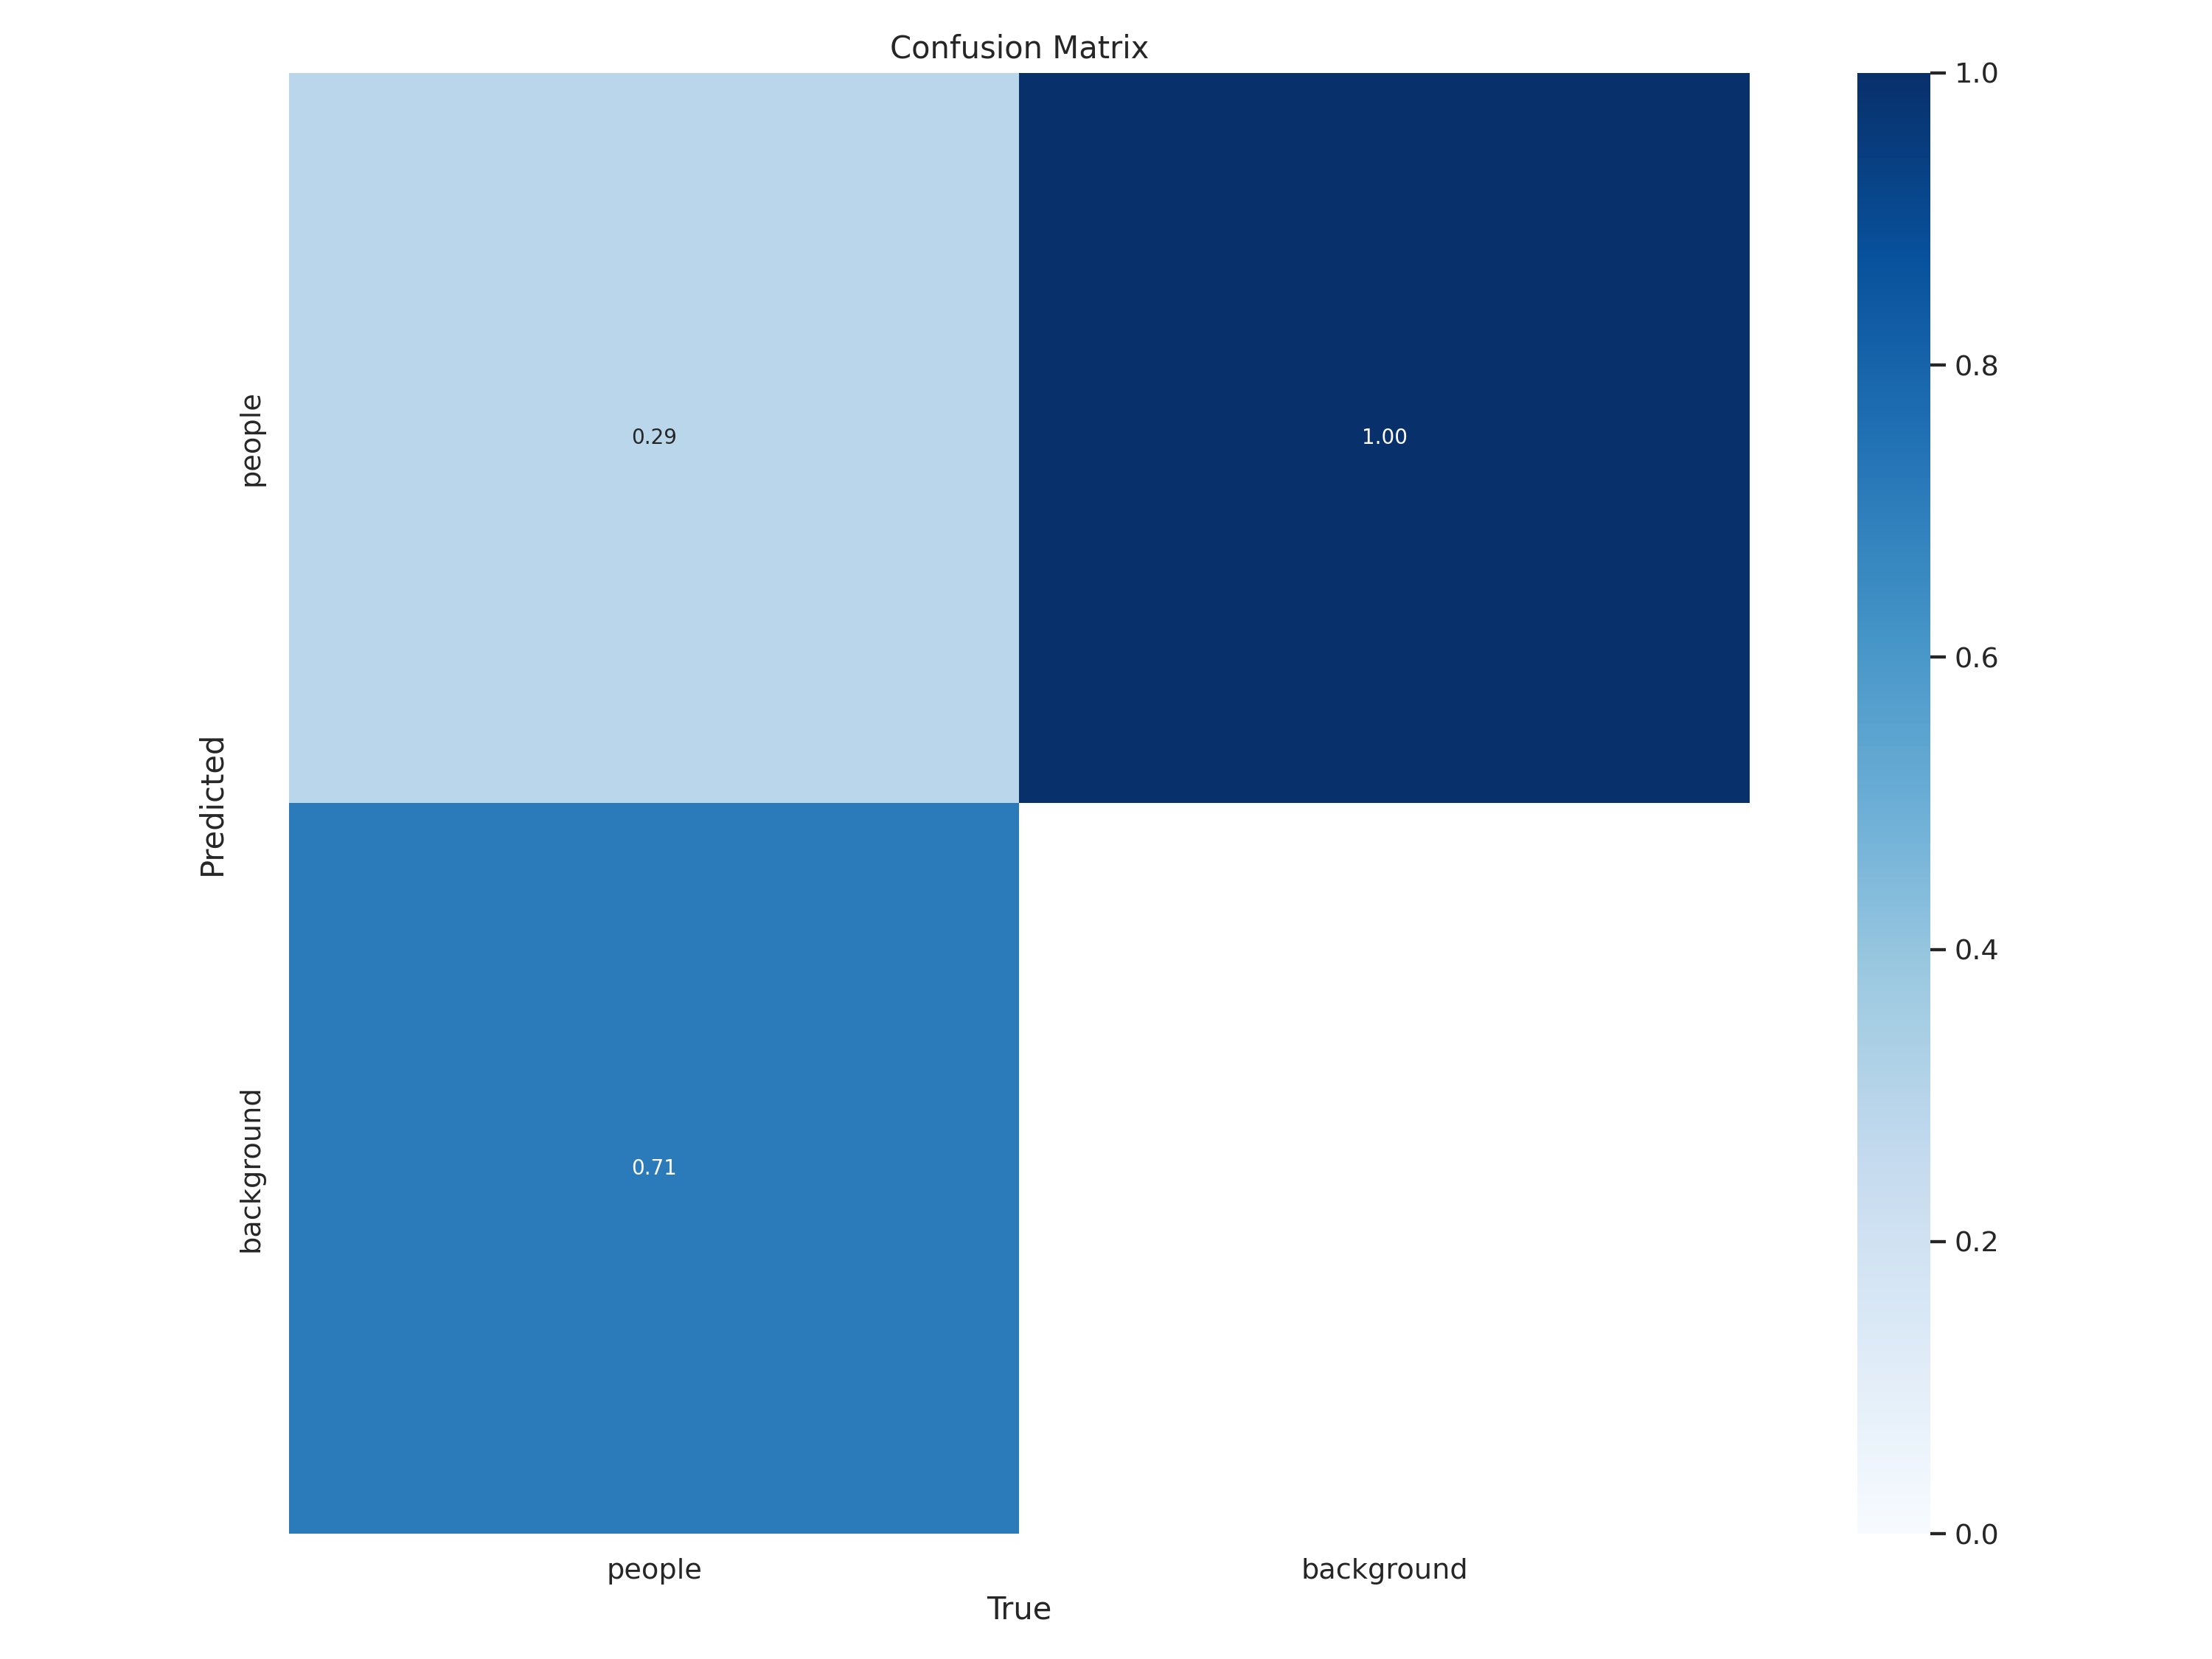

In [9]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

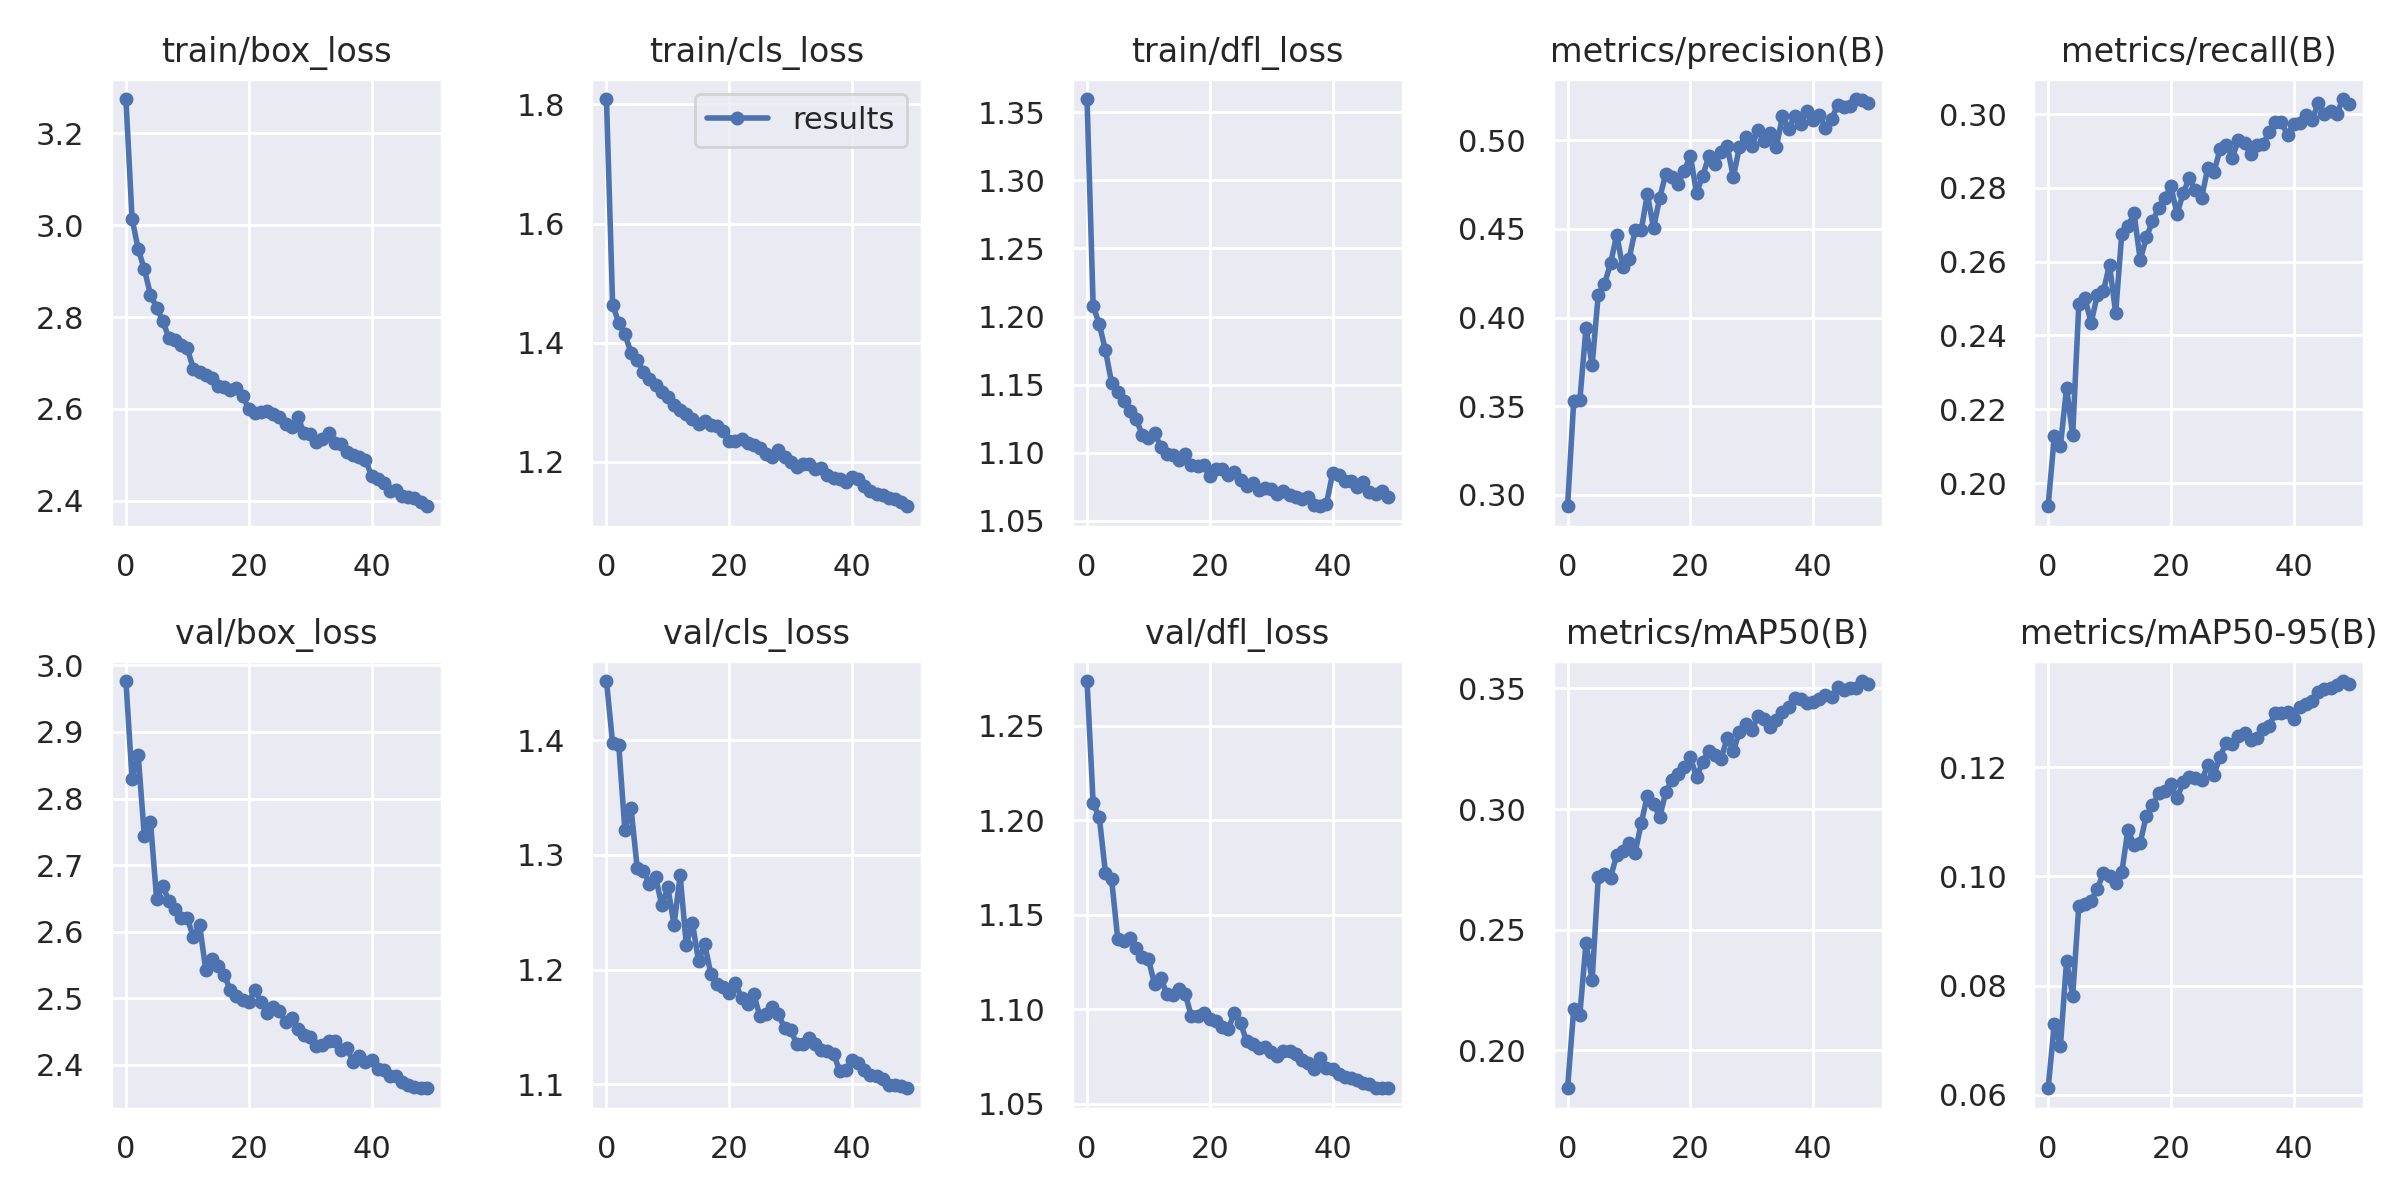

In [10]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [11]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

2024-04-15 18:12:39.489774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 18:12:39.489818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 18:12:39.491198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 18:12:40.657401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/people_counterv0-1/valid/labels.cache... 91

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.2 source={dataset.location}/test/images save_txt=true save_conf=true

2024-04-15 18:14:24.218370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 18:14:24.218421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 18:14:24.219768: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 18:14:25.257556: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/457 /content/datasets/people_counterv0-1/test/images/img_1003_jpg.

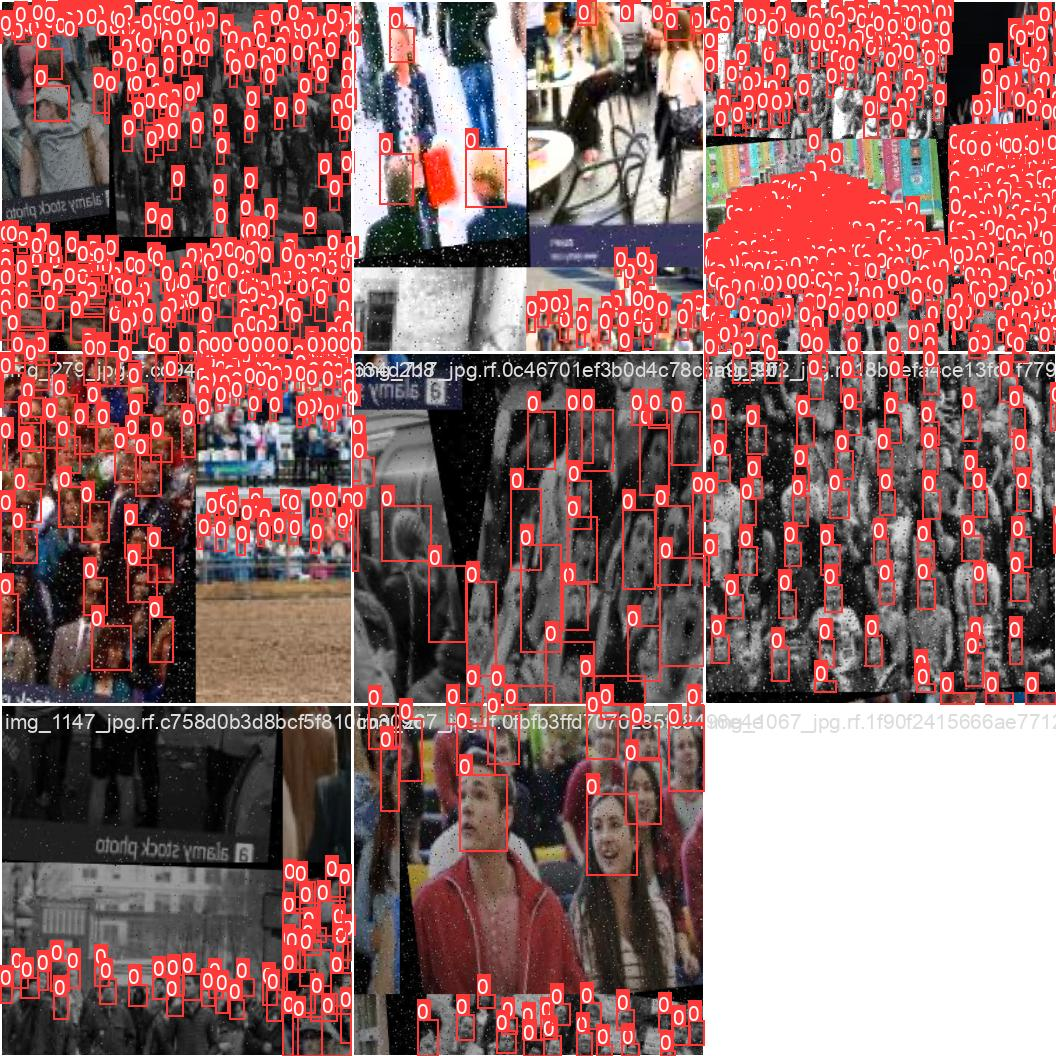

In [13]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width=600)

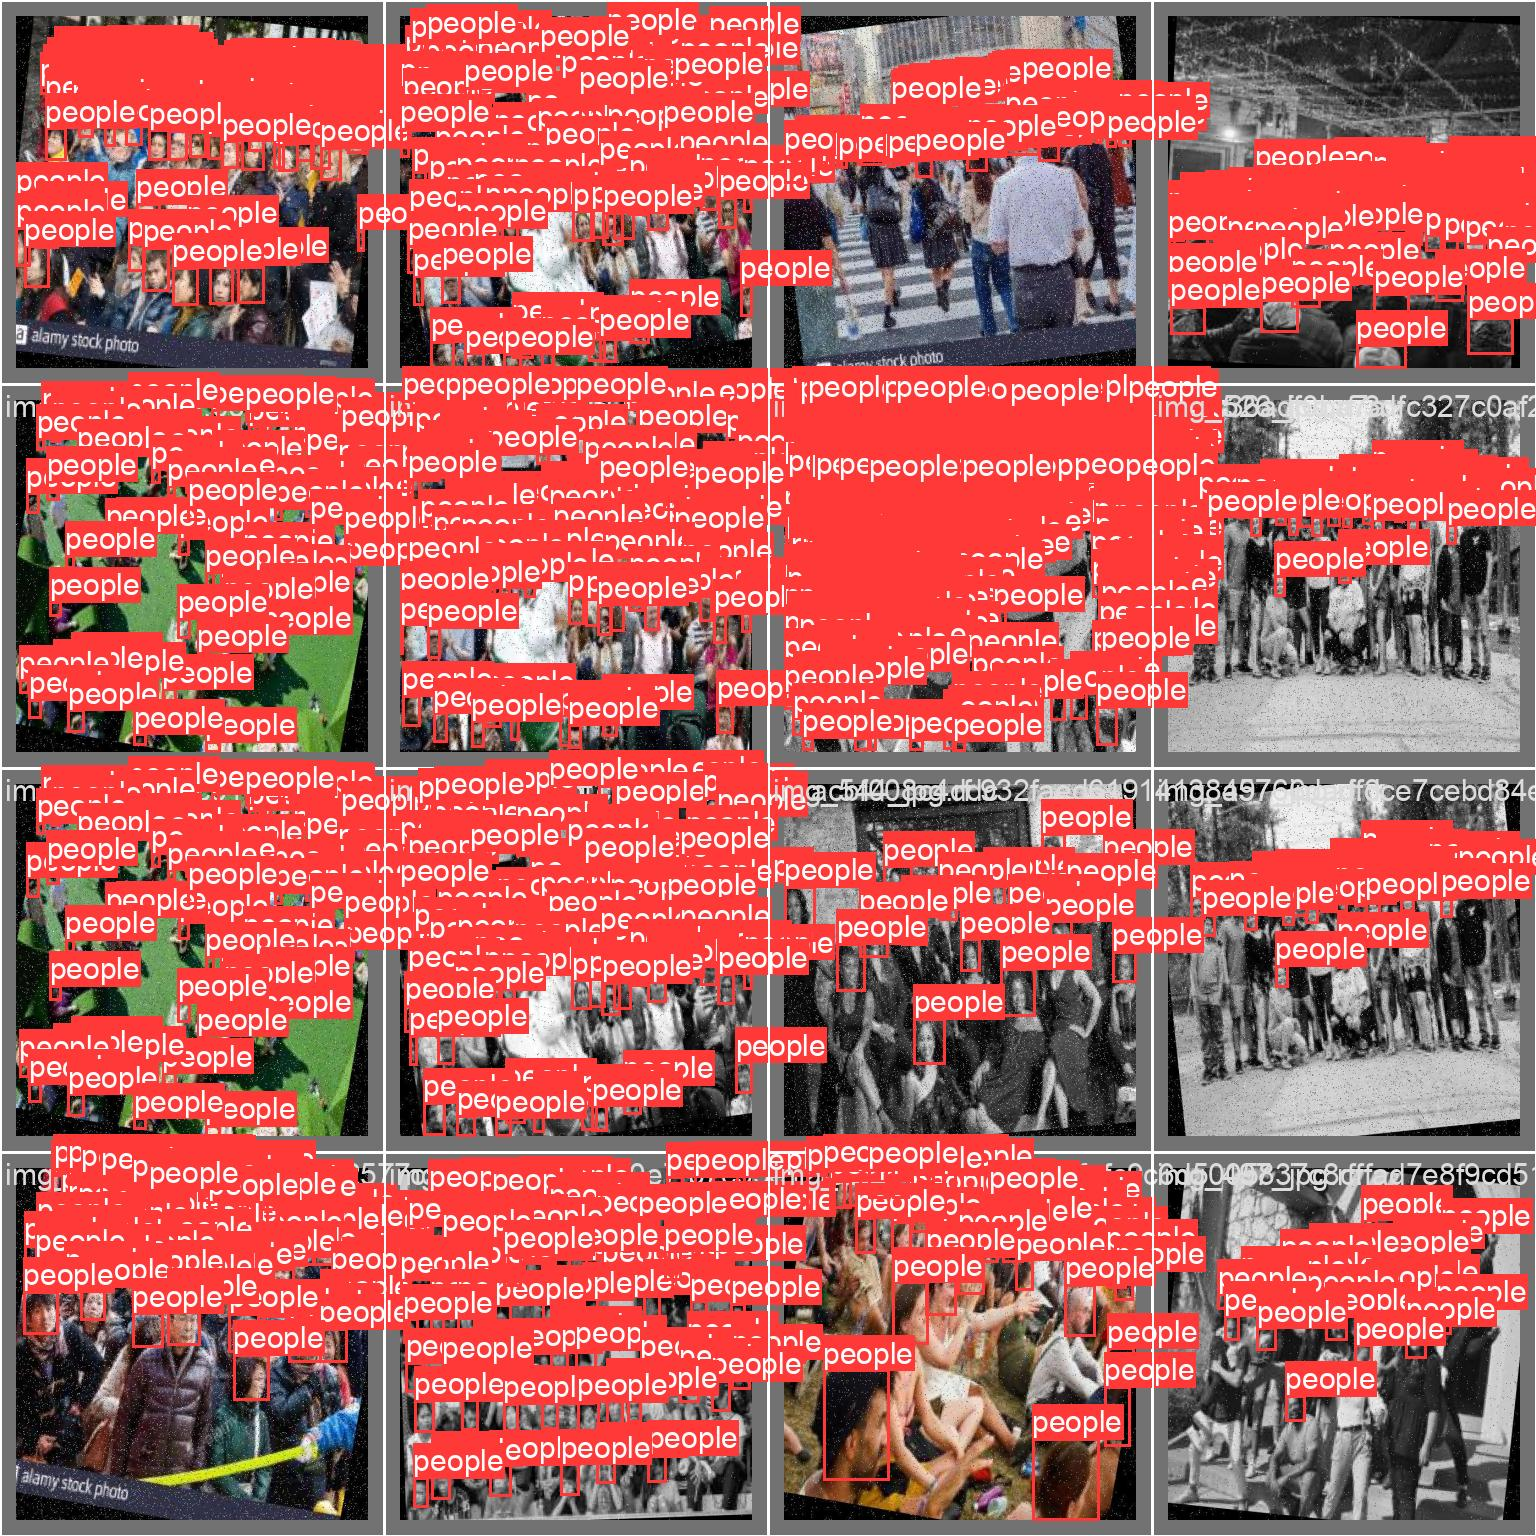

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/val/val_batch1_labels.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

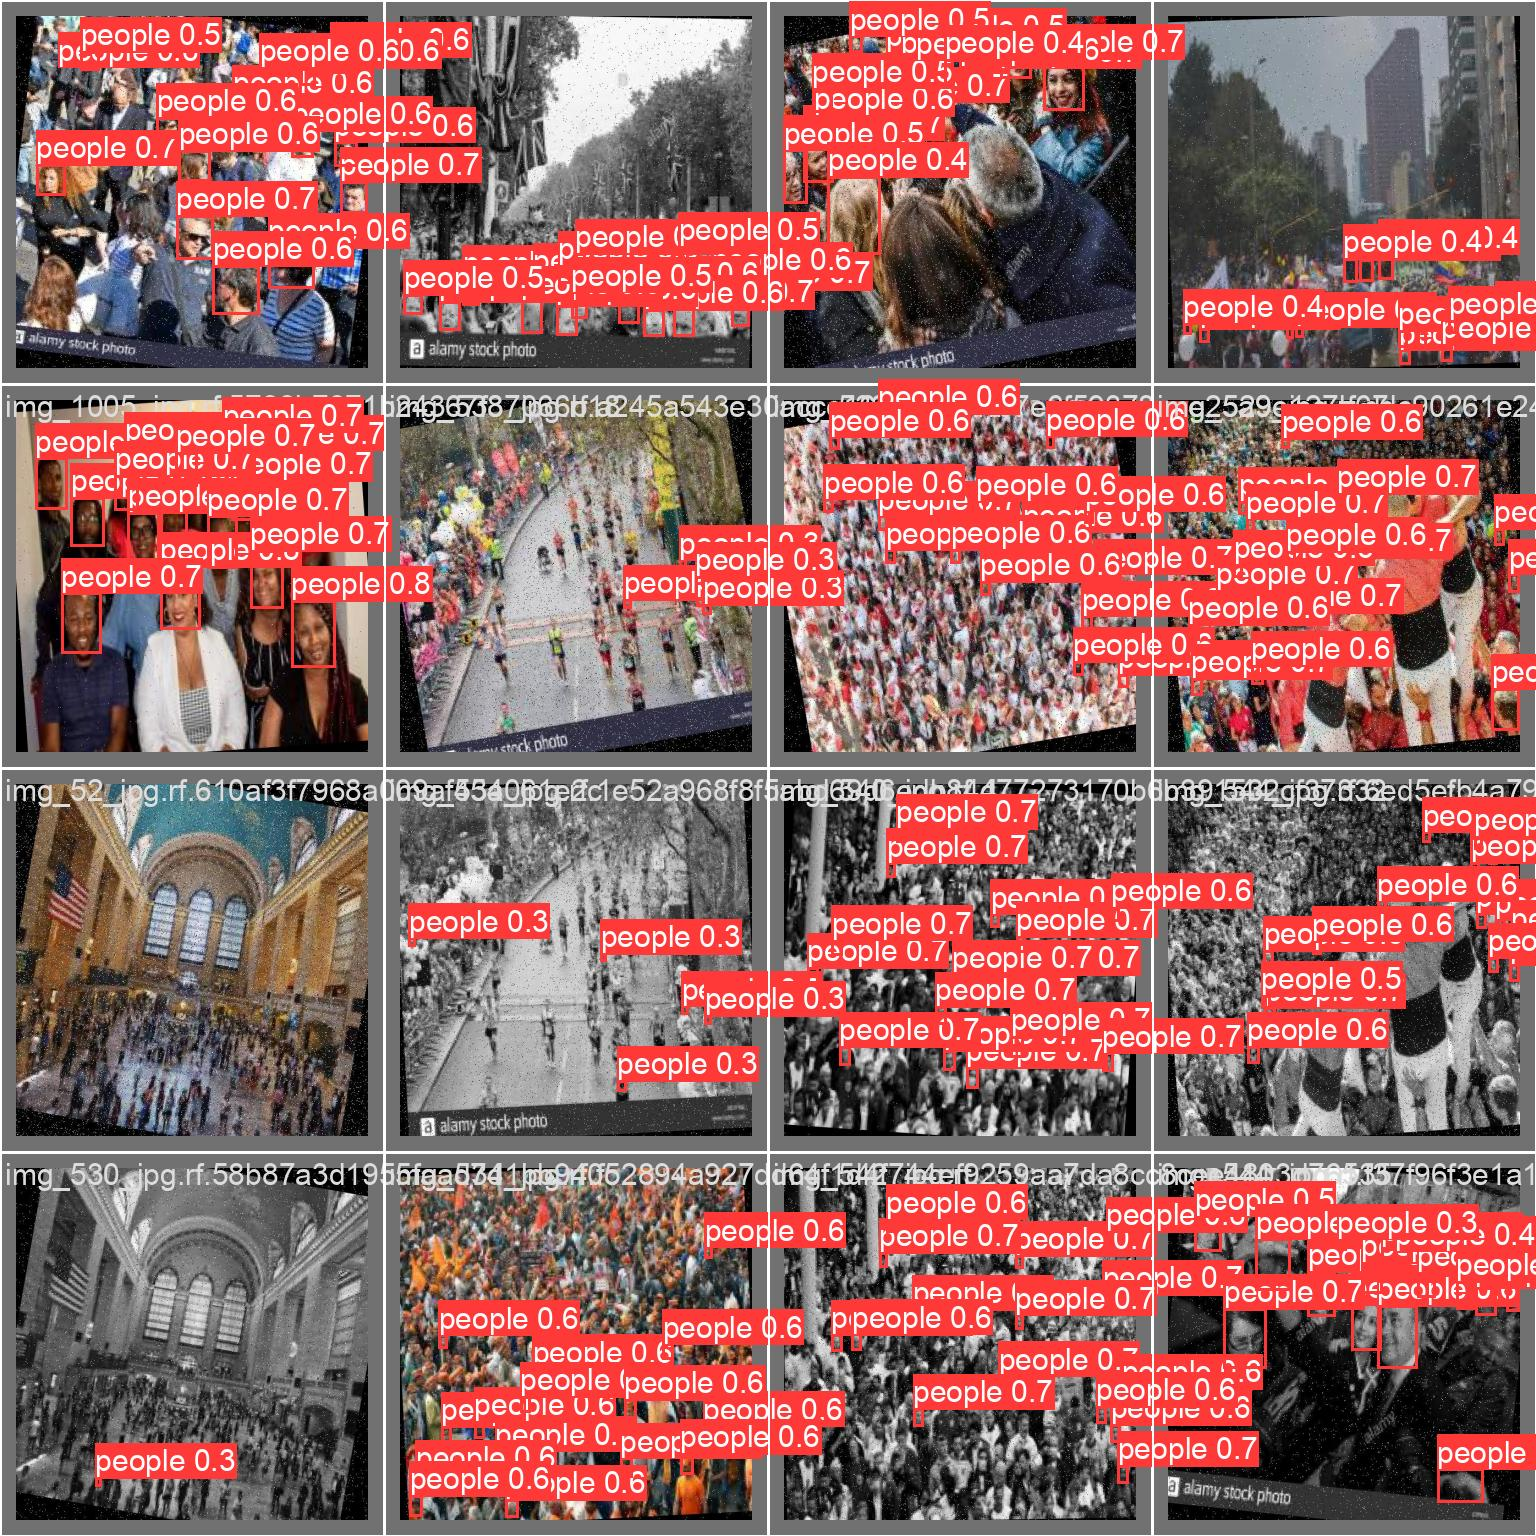

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch0_pred.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

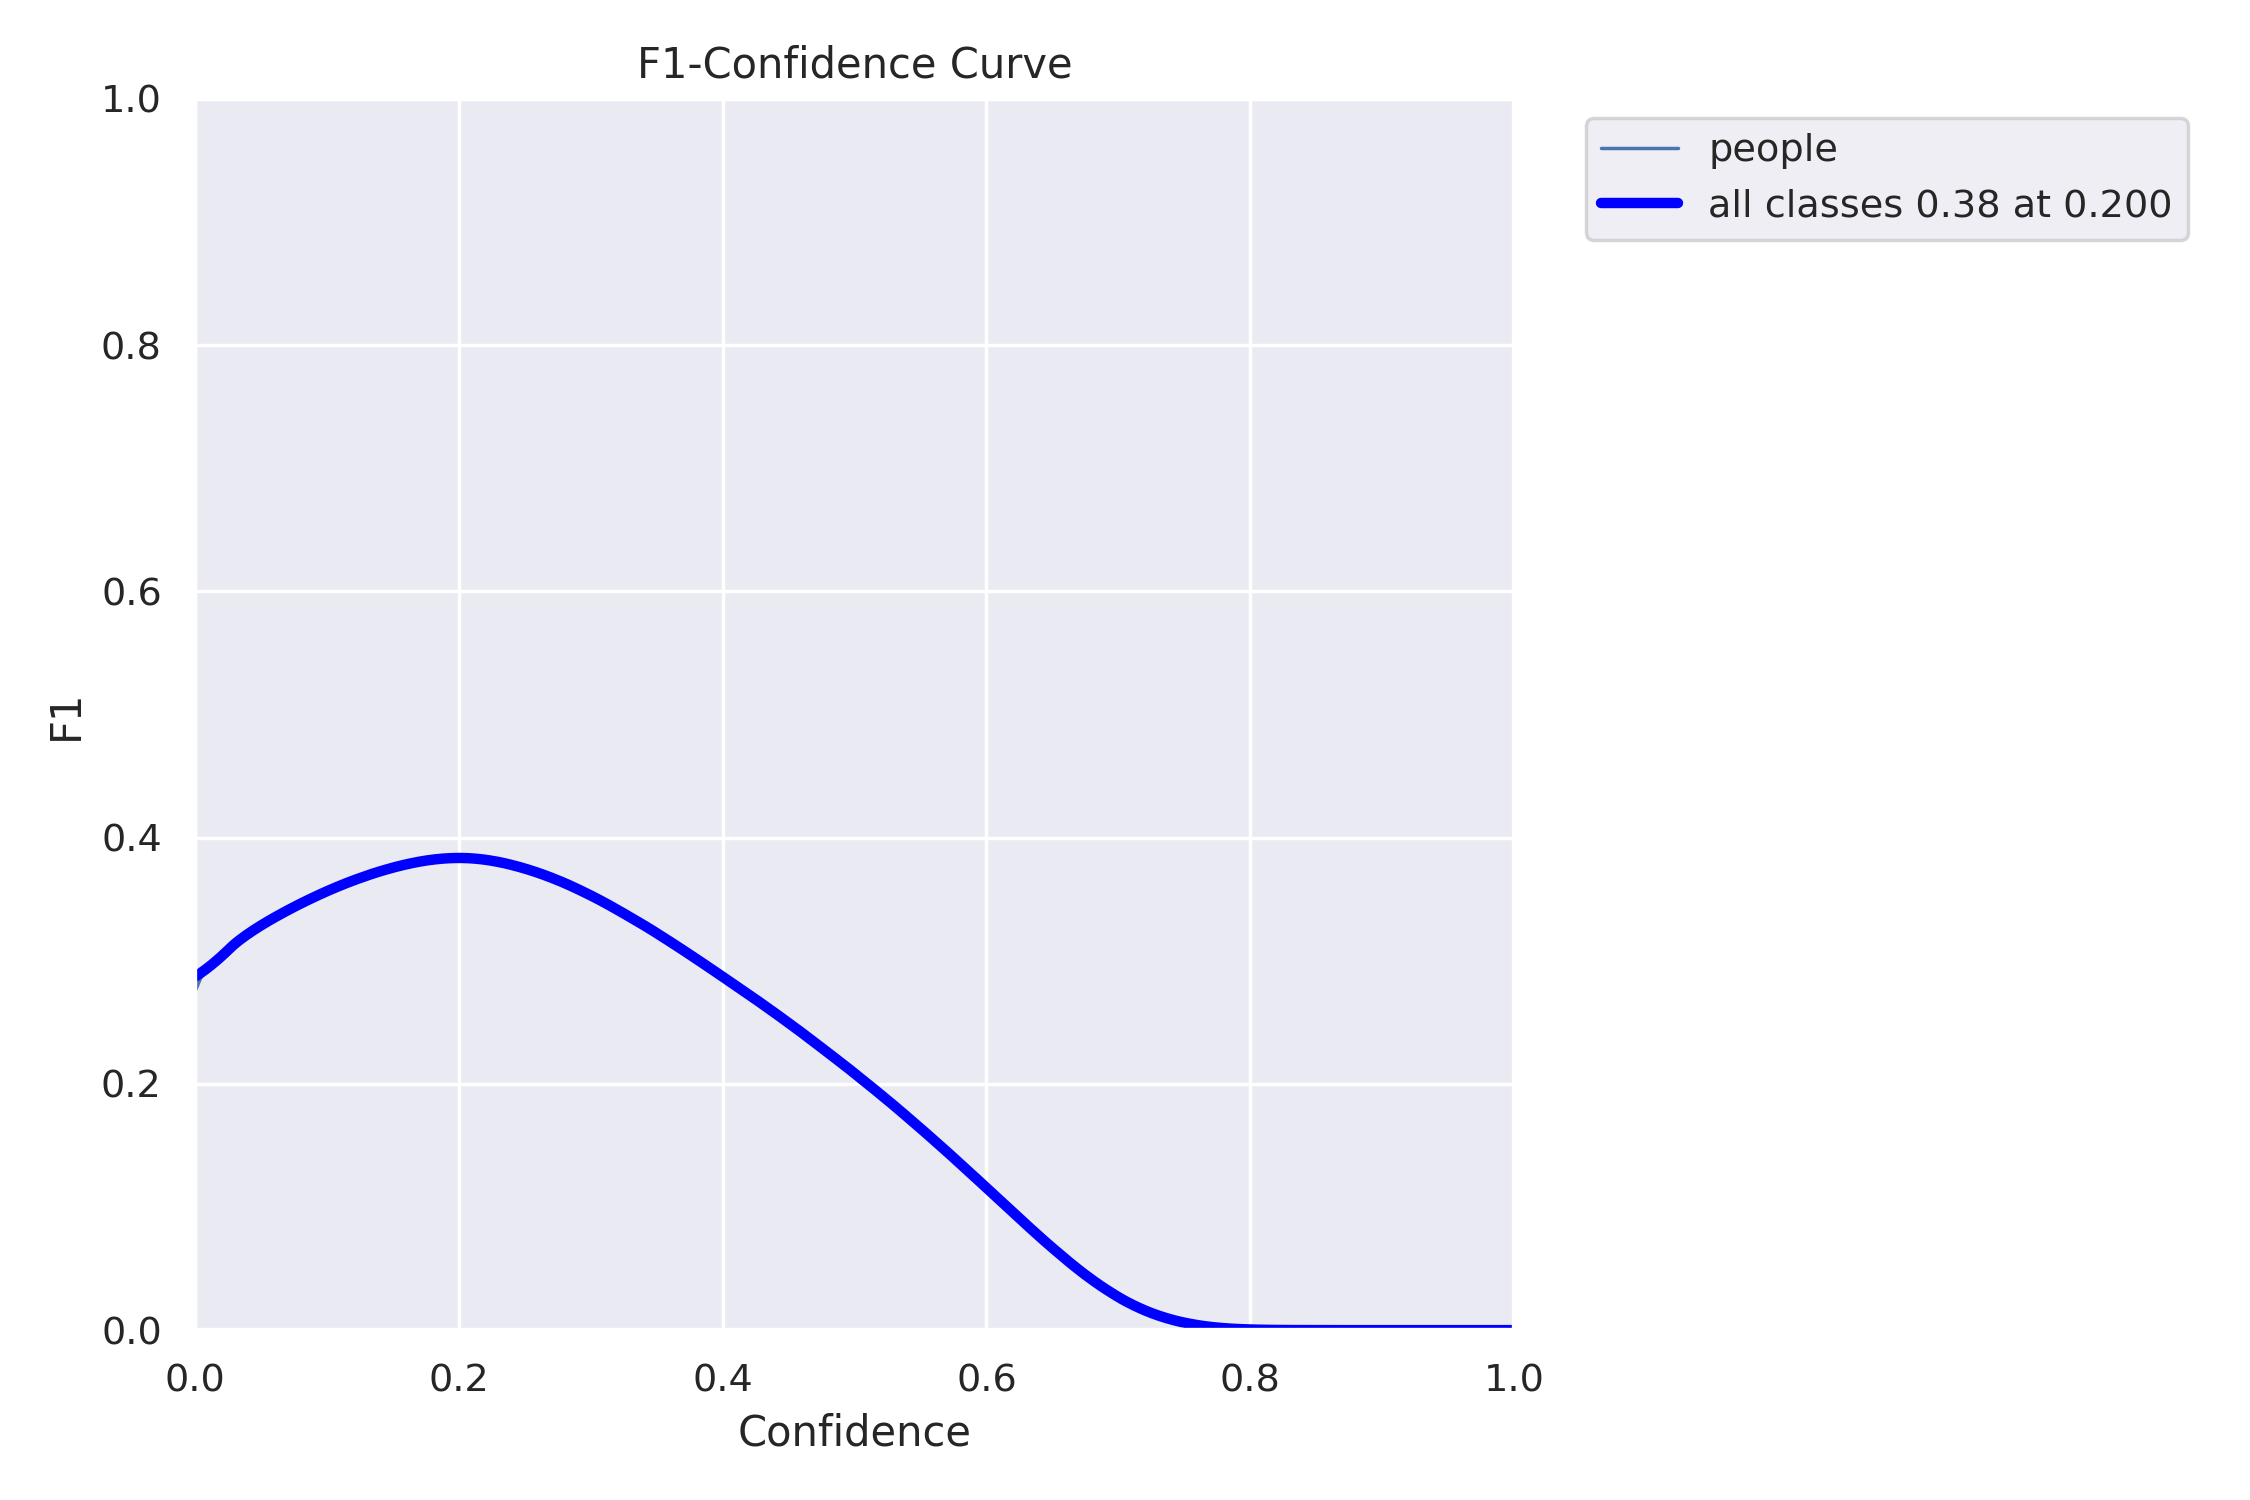

In [16]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=600)

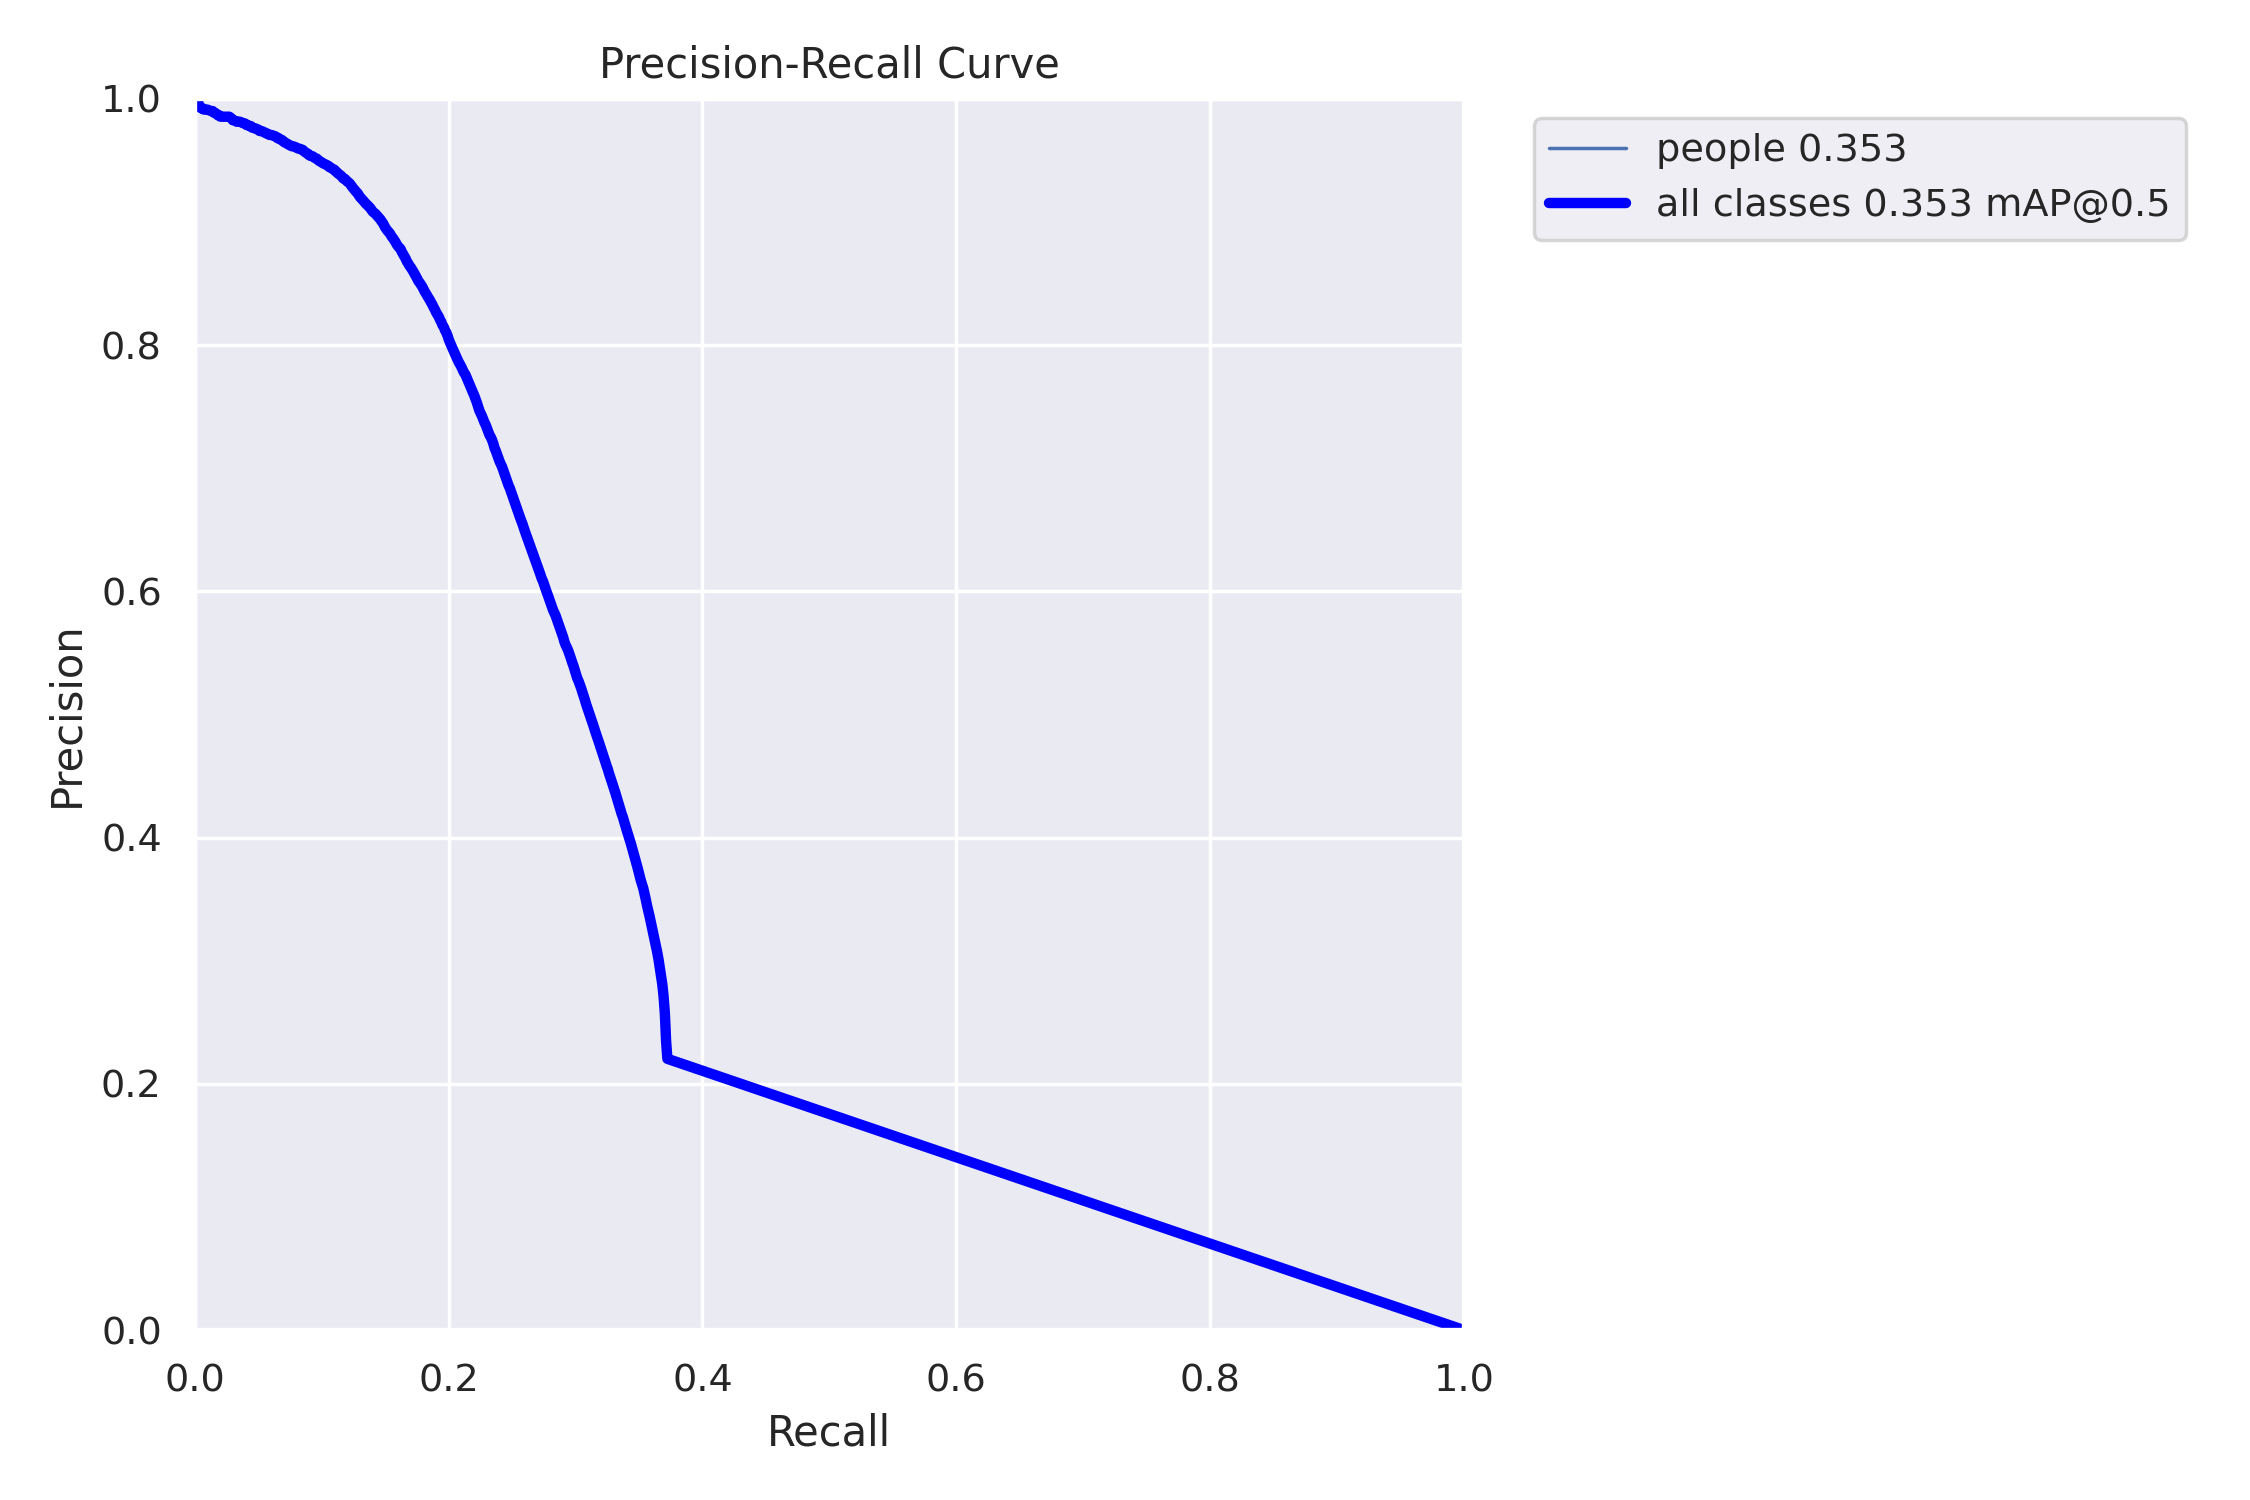

In [17]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

In [20]:
import csv

file_path = '/content/runs/detect/train/results.csv'

# Read and print CSV file
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

['                  epoch', '         train/box_loss', '         train/cls_loss', '         train/dfl_loss', '   metrics/precision(B)', '      metrics/recall(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '           val/box_loss', '           val/cls_loss', '           val/dfl_loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']
['                      0', '                 3.2742', '                  1.809', '                 1.3597', '                0.29351', '                0.19372', '                0.18422', '                0.06121', '                 2.9764', '                 1.4517', '                 1.2737', '               0.070075', '               0.003325', '               0.003325']
['                      1', '                 3.0136', '                 1.4639', '                 1.2078', '                0.35282', '                0.21267', '                 0.2171', '                0.07294', '                 2.8292'